# Deterministic Model

[69 67 95 72 80 89 73 72 68 98 86 93]
[120 191 150 163 121 199 190 102 194 165 100 127]


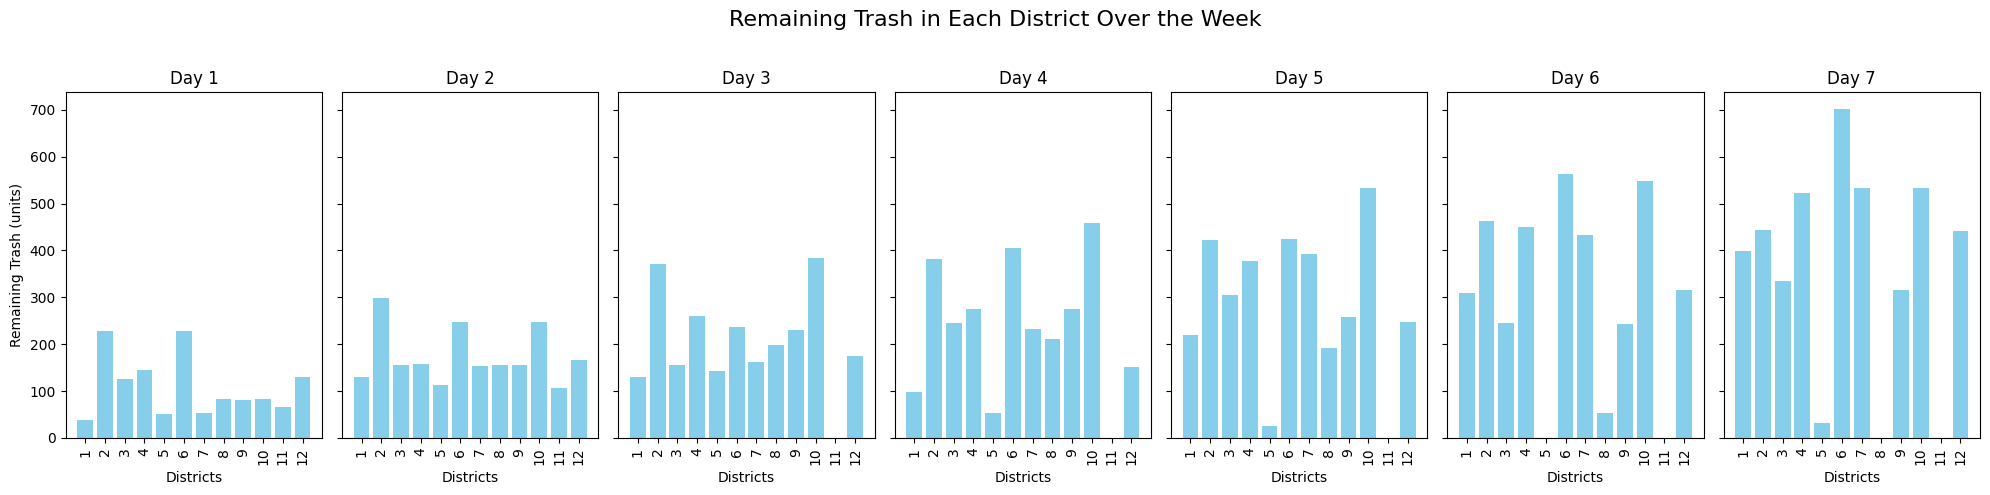

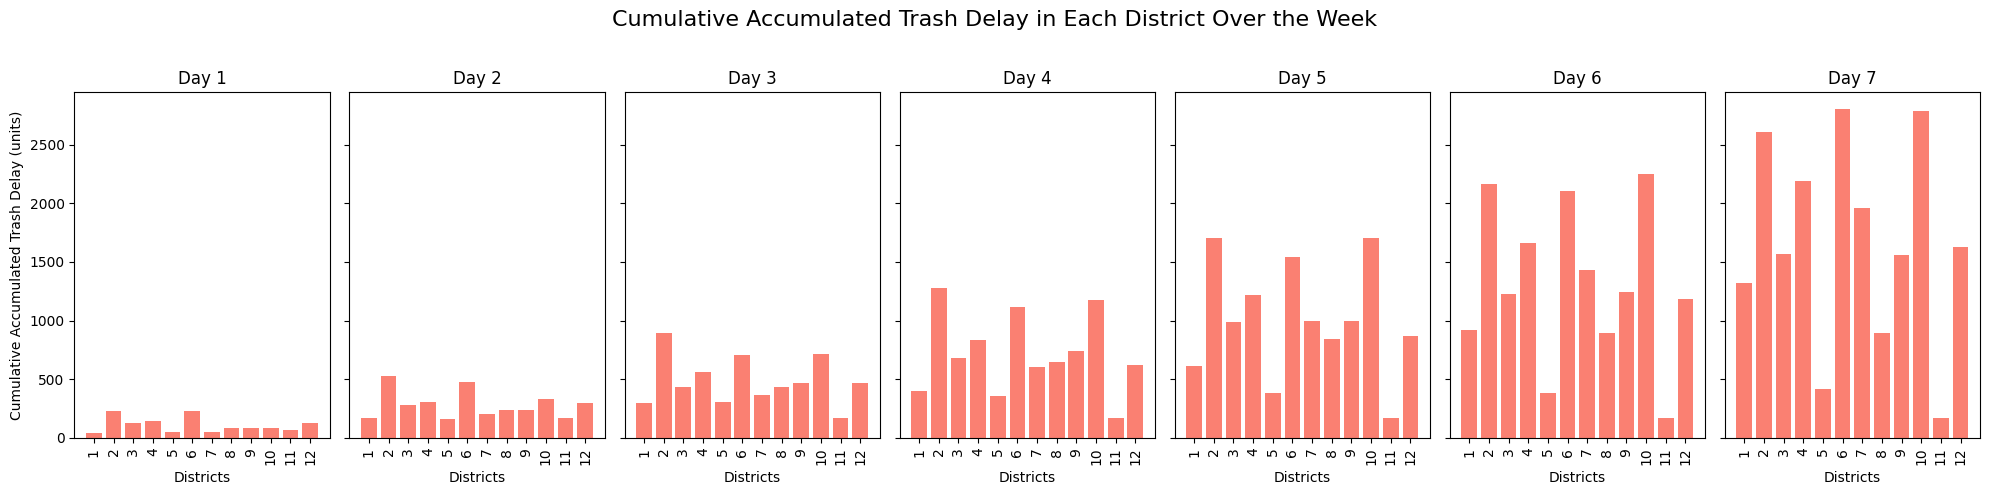

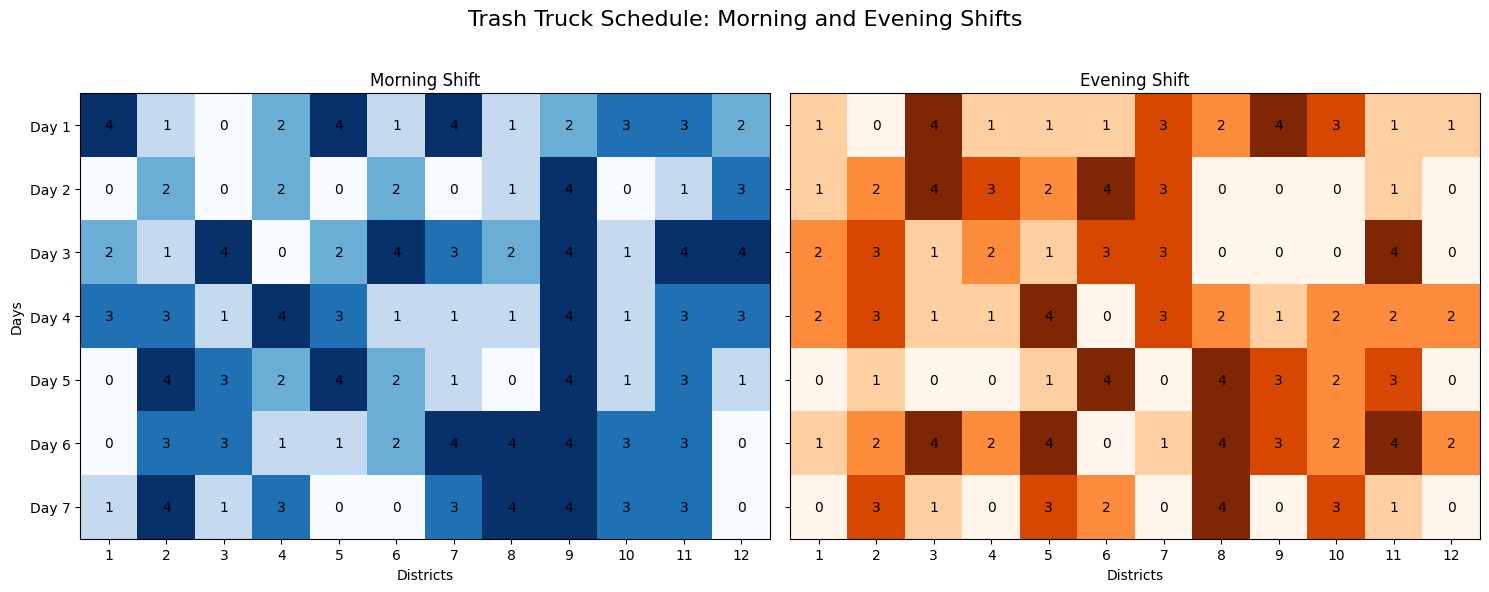

[[[4 1]
  [0 1]
  [2 2]
  [3 2]
  [0 0]
  [0 1]
  [1 0]]

 [[1 0]
  [2 2]
  [1 3]
  [3 3]
  [4 1]
  [3 2]
  [4 3]]

 [[0 4]
  [0 4]
  [4 1]
  [1 1]
  [3 0]
  [3 4]
  [1 1]]

 [[2 1]
  [2 3]
  [0 2]
  [4 1]
  [2 0]
  [1 2]
  [3 0]]

 [[4 1]
  [0 2]
  [2 1]
  [3 4]
  [4 1]
  [1 4]
  [0 3]]

 [[1 1]
  [2 4]
  [4 3]
  [1 0]
  [2 4]
  [2 0]
  [0 2]]

 [[4 3]
  [0 3]
  [3 3]
  [1 3]
  [1 0]
  [4 1]
  [3 0]]

 [[1 2]
  [1 0]
  [2 0]
  [1 2]
  [0 4]
  [4 4]
  [4 4]]

 [[2 4]
  [4 0]
  [4 0]
  [4 1]
  [4 3]
  [4 3]
  [4 0]]

 [[3 3]
  [0 0]
  [1 0]
  [1 2]
  [1 2]
  [3 2]
  [3 3]]

 [[3 1]
  [1 1]
  [4 4]
  [3 2]
  [3 3]
  [3 4]
  [3 1]]

 [[2 1]
  [3 0]
  [4 0]
  [3 2]
  [1 0]
  [0 2]
  [0 0]]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# def simulate_schedule(schedule, initial_trash, new_trash, capacity):
#     days, shifts, districts = 7, 2, 12  # Dimensions of the schedule
#     trash_hours = 0  # Cumulative trash accumulation in hours
#     total_trucks_used = 0  # Total trucks dispatched
#     total_capacity_used = 0  # Total trash carried by trucks
#     total_possible_capacity = 0  # Total possible capacity based on trucks dispatched

    
#     # Initialize trash in each district
#     trash = np.array(initial_trash)
#     daily_trash_data = np.zeros((days, districts, 2))  # 7 x 12 array with two values for each day and district

#     # Loop over each day and each shift
#     for j in range(days):
#         daily_accumulated_trash = np.zeros(districts)  # Track accumulation for the day
#         for k in range(shifts):
#             for i in range(districts):
#                 # Add new trash in the morning shift
#                 if k == 0:
#                     trash[i] += new_trash[i]  # New trash generated for the day
                
#                 # Calculate the collection capacity
#                 trucks_sent = schedule[i][j][k]
#                 collection_capacity = trucks_sent * capacity
#                 collected_trash = min(trash[i], collection_capacity)
                
#                 # Update remaining trash and accumulation
#                 trash[i] -= collected_trash
#                 total_trucks_used += trucks_sent
#                 total_capacity_used += collected_trash
#                 total_possible_capacity += collection_capacity
                
#             # Track trash accumulation after both shifts
#             if k == 1:
#                 daily_accumulated_trash += trash  # Accumulate uncollected trash for each district

#         # Update daily data after both shifts
#         for i in range(districts):
#             daily_trash_data[j, i, 0] = trash[i]  # Remaining trash
#             daily_trash_data[j, i, 1] = daily_accumulated_trash[i]  # Accumulated trash delay

#         # Accumulate trash hours at the end of the day
#         trash_hours += np.sum(trash)
        
#     return daily_trash_data


schedule = np.random.randint(0, 5, (12, 7, 2))  # Random schedule of trucks for 12 districts, 7 days, 2 shifts
initial_trash = np.random.randint(50, 100, 12)  # Random initial trash in each district
new_trash = np.random.randint(100, 200, 12)  # Random new trash generated per day per district
capacity = 30  # Truck capacity


print(initial_trash)
print(new_trash)

data = simulate_schedule(schedule, initial_trash, new_trash, capacity)

def plot_remaining_trash_week(daily_trash_data):
    """
    Plots the remaining trash for each district across all 7 days.
    
    Parameters:
    - daily_trash_data: 3D numpy array containing trash data in the form (days, districts, 2),
                        where the third dimension holds [remaining_trash, accumulated_trash_delay].
    """
    days = daily_trash_data.shape[0]
    districts = daily_trash_data.shape[1]
    
    # Set up the figure with subplots for each day
    fig, axs = plt.subplots(1, days, figsize=(20, 5), sharey=True)
    fig.suptitle('Remaining Trash in Each District Over the Week', fontsize=16)
    
    # Loop over each day and plot the remaining trash for all districts
    for day in range(days):
        remaining_trash = daily_trash_data[day, :, 0]  # Extract remaining trash for all districts on the given day
        axs[day].bar(range(districts), remaining_trash, color='skyblue')
        axs[day].set_title(f'Day {day + 1}')
        axs[day].set_xlabel('Districts')
        axs[day].set_xticks(range(districts))
        axs[day].set_xticklabels([f'{i+1}' for i in range(districts)], rotation=90)
    
    axs[0].set_ylabel('Remaining Trash (units)')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

# Example usage
plot_remaining_trash_week(data)  # Plot remaining trash for the whole week

def plot_trash_delay_accumulation_week(daily_trash_data):
    """
    Plots the accumulated trash delay for each district across all 7 days, showing cumulative accumulation over time.
    
    Parameters:
    - daily_trash_data: 3D numpy array containing trash data in the form (days, districts, 2),
                        where the third dimension holds [remaining_trash, accumulated_trash_delay].
    """
    days = daily_trash_data.shape[0]
    districts = daily_trash_data.shape[1]
    
    # Calculate cumulative accumulated trash delay over the week
    cumulative_trash_delay = np.zeros((days, districts))
    cumulative_trash_delay[0] = daily_trash_data[0, :, 1]  # Initialize with the first day's accumulated delay
    
    for day in range(1, days):
        cumulative_trash_delay[day] = cumulative_trash_delay[day - 1] + daily_trash_data[day, :, 1]  # Add previous day's delay

    # Set up the figure with subplots for each day
    fig, axs = plt.subplots(1, days, figsize=(20, 5), sharey=True)
    fig.suptitle('Cumulative Accumulated Trash Delay in Each District Over the Week', fontsize=16)
    
    # Loop over each day and plot the cumulative accumulated trash delay for all districts
    for day in range(days):
        axs[day].bar(range(districts), cumulative_trash_delay[day], color='salmon')
        axs[day].set_title(f'Day {day + 1}')
        axs[day].set_xlabel('Districts')
        axs[day].set_xticks(range(districts))
        axs[day].set_xticklabels([f'{i+1}' for i in range(districts)], rotation=90)
    
    axs[0].set_ylabel('Cumulative Accumulated Trash Delay (units)')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

def calculate_trash_delay(daily_trash_data):
    days = daily_trash_data.shape[0]
    districts = daily_trash_data.shape[1]
    
    # Calculate cumulative accumulated trash delay over the week
    cumulative_trash_delay = np.zeros((days, districts))
    cumulative_trash_delay[0] = daily_trash_data[0, :, 1]  # Initialize with the first day's accumulated delay
    
    for day in range(1, days):
        cumulative_trash_delay[day] = cumulative_trash_delay[day - 1] + daily_trash_data[day, :, 1]  # Add previous day's delay
    
    return cumulative_trash_delay[day]


# Example usage
plot_trash_delay_accumulation_week(data)  # Plot accumulated trash delay for the whole week


def plot_truck_schedule_with_numbers_complete(schedule):
    """
    Visualizes the truck schedule over a week with two subplots for morning and evening shifts,
    displaying the number of trucks in each cell centered and adding color to indicate quantities.
    
    Parameters:
    - schedule: 3D numpy array with shape (12, 7, 2) where schedule[i][j][k] represents
                the number of trucks sent to district i on day j in shift k (0 for morning, 1 for evening).
    """
    days, districts = schedule.shape[1], schedule.shape[0]

    # Extract morning and evening schedules
    morning_schedule = schedule[:, :, 0].T  # Transpose for 7x12 display
    evening_schedule = schedule[:, :, 1].T  # Transpose for 7x12 display

    # Set up the figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    fig.suptitle("Trash Truck Schedule: Morning and Evening Shifts", fontsize=16)

    # Morning shift schedule with color
    im1 = axs[0].imshow(morning_schedule, cmap='Blues', aspect='auto', vmin=0, vmax=np.max(schedule))
    axs[0].set_title("Morning Shift")
    axs[0].set_xlabel("Districts")
    axs[0].set_ylabel("Days")
    axs[0].set_xticks(range(districts))
    axs[0].set_xticklabels([f'{i+1}' for i in range(districts)])
    axs[0].set_yticks(range(days))
    axs[0].set_yticklabels([f'Day {j+1}' for j in range(days)])

    # Add numbers to morning shift cells
    for i in range(days):
        for j in range(districts):
            axs[0].text(j, i, f"{morning_schedule[i, j]}", ha='center', va='center', color='black', fontsize=10)

    # Evening shift schedule with color
    im2 = axs[1].imshow(evening_schedule, cmap='Oranges', aspect='auto', vmin=0, vmax=np.max(schedule))
    axs[1].set_title("Evening Shift")
    axs[1].set_xlabel("Districts")
    axs[1].set_xticks(range(districts))
    axs[1].set_xticklabels([f'{i+1}' for i in range(districts)])
    axs[1].set_yticks(range(days))
    axs[1].set_yticklabels([f'Day {j+1}' for j in range(days)])

    # Add numbers to evening shift cells
    for i in range(days):
        for j in range(districts):
            axs[1].text(j, i, f"{evening_schedule[i, j]}", ha='center', va='center', color='black', fontsize=10)

    # Colorbars to indicate truck counts
    # fig.colorbar(im1, ax=axs[0], orientation="vertical", label="Number of Trucks")
    # fig.colorbar(im2, ax=axs[1], orientation="vertical", label="Number of Trucks")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Example usage
plot_truck_schedule_with_numbers_complete(schedule)  # Visualize the truck schedule with day labels on both plots

# Example usage
print(schedule)


# Stochastic Model

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import os




def plot_week_data(daily_trash_data, y_label, title, filename=None):
    """
    Plots the remaining trash for each district across all 7 days and optionally saves the plot to a file.
    
    Parameters:
    - daily_trash_data: 3D numpy array containing trash data in the form (days, districts, 2),
                        where the third dimension holds [remaining_trash, accumulated_trash_delay].
    - y_label: Label for the y-axis.
    - title: Title of the plot.
    - filename: Optional; if provided, the plot will be saved to this file.
    """
    days = daily_trash_data.shape[0]
    districts = daily_trash_data.shape[1]
    day_names = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    
    # Set up the figure with subplots for each day
    fig, axs = plt.subplots(1, days, figsize=(20, 5), sharey=True)
    fig.suptitle(title, fontsize=20)
    
    # Loop over each day and plot the remaining trash for all districts
    for day in range(days):
        remaining_trash = daily_trash_data[day, :]  # Extract remaining trash for all districts on the given day
        axs[day].bar(range(districts), remaining_trash, color='skyblue')
        axs[day].set_title(day_names[day], fontsize=15)  # Set title to day name
        axs[day].set_xlabel('Districts', fontsize=15)
        axs[day].set_xticks(range(districts))
        axs[day].set_xticklabels([f'{i+1}' for i in range(districts)], rotation=90, fontsize=15)
    
    axs[0].set_ylabel(y_label)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title

    # Save the plot if a filename is provided
    if filename:
        plt.savefig(filename)
    
    plt.show()


def calculate_trash_delay(daily_trash_data):
    days = daily_trash_data.shape[0]
    districts = daily_trash_data.shape[1]
    
    # Calculate cumulative accumulated trash delay over the week
    cumulative_trash_delay = np.zeros((days, districts))
    cumulative_trash_delay[0] = daily_trash_data[0, :, 1]  # Initialize with the first day's accumulated delay
    
    for day in range(1, days):
        cumulative_trash_delay[day] = cumulative_trash_delay[day - 1] + daily_trash_data[day, :, 1]  # Add previous day's delay
    
    return cumulative_trash_delay[day]

def plot_truck_schedule(schedule, filename=None):
    """
    Visualizes the truck schedule over a week with two subplots for morning and evening shifts,
    displaying the number of trucks in each cell centered and adding color to indicate quantities.
    
    Parameters:
    - schedule: 3D numpy array with shape (12, 7, 2) where schedule[i][j][k] represents
                the number of trucks sent to district i on day j in shift k (0 for morning, 1 for evening).
    - filename: Optional; if provided, the plot will be saved to this file.
    """
    days, districts = schedule.shape[1], schedule.shape[0]
    day_names = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

    # Extract morning and evening schedules
    morning_schedule = schedule[:, :, 0].T  # Transpose for 7x12 display
    evening_schedule = schedule[:, :, 1].T  # Transpose for 7x12 display

    # Set up the figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    fig.suptitle("Trash Truck Schedule: Morning and Evening Shifts", fontsize=20)

    # Morning shift schedule with color
    im1 = axs[0].imshow(morning_schedule, cmap='Blues', aspect='auto', vmin=0, vmax=np.max(schedule))
    axs[0].set_title("Morning Shift", fontsize=15)
    axs[0].set_xlabel("Districts", fontsize=15)
    axs[0].set_ylabel("Days", fontsize=15)
    axs[0].set_xticks(range(districts))
    axs[0].set_xticklabels([f'{i+1}' for i in range(districts)])
    axs[0].set_yticks(range(days))
    axs[0].set_yticklabels(day_names, fontsize=12)  # Set day names as y-tick labels

    # Add integer labels to morning shift cells
    for i in range(days):
        for j in range(districts):
            axs[0].text(j, i, f"{int(morning_schedule[i, j])}", ha='center', va='center', color='black', fontsize=15)

    # Evening shift schedule with color
    im2 = axs[1].imshow(evening_schedule, cmap='Oranges', aspect='auto', vmin=0, vmax=np.max(schedule))
    axs[1].set_title("Evening Shift", fontsize=15)
    axs[1].set_xlabel("Districts", fontsize=15)
    axs[1].set_xticks(range(districts))
    axs[1].set_xticklabels([f'{i+1}' for i in range(districts)])
    axs[1].set_yticks(range(days))
    axs[1].set_yticklabels(day_names, fontsize=12)  # Set day names as y-tick labels

    # Add integer labels to evening shift cells
    for i in range(days):
        for j in range(districts):
            axs[1].text(j, i, f"{int(evening_schedule[i, j])}", ha='center', va='center', color='black', fontsize=15)


    # Save the plot if a filename is provided
    if filename:
        plt.savefig(filename)

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

def shuffle_rows(arr):
    """
    For each row along the first axis, randomly swap one non-zero element with one zero element.
    
    Parameters:
    - arr: numpy array of any shape with at least two axes.
    
    Returns:
    - A new array with one random swap between a non-zero and a zero element in each row along the first axis.
    """
    # Copy the array to avoid modifying the original
    swapped_array = np.copy(arr)
    
    # Iterate through each row along the first axis
    for i in range(swapped_array.shape[0]):
        # Flatten the row to make it easier to find indices
        row_flat = swapped_array[i].flatten()
        
        # Get indices of zero and non-zero elements
        zero_indices = np.where(row_flat == 0)[0]
        non_zero_indices = np.where(row_flat != 0)[0]
        
        # Check if there is at least one zero and one non-zero element
        if len(zero_indices) > 0 and len(non_zero_indices) > 0:
            # Randomly select one zero and one non-zero index
            zero_index = np.random.choice(zero_indices)
            non_zero_index = np.random.choice(non_zero_indices)
            
            # Swap the selected elements
            row_flat[zero_index], row_flat[non_zero_index] = row_flat[non_zero_index], row_flat[zero_index]
        
        # Reshape the row back to its original shape and assign it to the result array
        swapped_array[i] = row_flat.reshape(swapped_array[i].shape)
    
    return swapped_array

def keep_top_three(arr):
    # Flatten the last two dimensions to find the top 3 largest values in each "row" of the first axis
    sorted_indices = np.argsort(arr.reshape(arr.shape[0], -1), axis=-1)[:, -3:]  # Get indices of the top 3 values
    result = np.zeros_like(arr)
    # For each row, set the top 3 values
    for i in range(arr.shape[0]):
        flat_indices = np.unravel_index(sorted_indices[i], arr.shape[1:])
        result[i][flat_indices] = arr[i][flat_indices]
    return result

def generate_normal_samples(district_mean, district_std_devs, days):
    """
    Generates a 2D array of random samples for each district over a specified number of days.
    
    Parameters:
    district_mean (np.array): Array of means for each district.
    district_std_devs (np.array): Array of standard deviations for each district.
    days (int): Number of days to generate samples for.
    
    Returns:
    samples (np.array): 2D array of shape (len(district_mean), days), where each row corresponds
                        to a district and each column corresponds to a random sample for a day.
    """
    # Ensure the input arrays have the same shape
    if district_mean.shape != district_std_devs.shape:
        raise ValueError("Input arrays must have the same shape.")
    
    # Generate a 2D array of samples with shape (number of districts, days)
    samples = np.random.normal(loc=district_mean[:, np.newaxis], scale=district_std_devs[:, np.newaxis], size=(len(district_mean), days))

    samples = np.where(samples < 0, 0, samples).astype(int)

    
    return samples

def simulate_schedule(schedule, district_trash, capacity):
    days, shifts, districts = 7, 2, 12  # Dimensions of the schedule
    
    # Initialize trash in each district
    trash = np.zeros(12)
    daily_trash_leftover = np.zeros((days, districts))  # 7 x 12 array with two values for each day and district
    daily_trash_accumulation = np.zeros((days, districts))
    total_trucks_used = np.zeros(districts)
    total_capacity_used = np.zeros(districts)
    total_possible_capacity = np.zeros(districts)
    # Loop over each day and each shift
    for j in range(days):
        daily_accumulated_trash = np.zeros(districts)  # Track accumulation for the day
        for k in range(shifts):
            for i in range(districts):
                # Add new trash in the morning shift
                if k == 0:
                    trash[i] += district_trash[i][j]  # New trash generated for the day
                
                # Calculate the collection capacity
                trucks_sent = schedule[i][j][k]
                collection_capacity = trucks_sent * capacity
                collected_trash = min(trash[i], collection_capacity)
                
                # Update remaining trash and accumulation
                trash[i] -= collected_trash
                total_trucks_used[i] += trucks_sent
                total_capacity_used[i] += collected_trash
                total_possible_capacity[i] += collection_capacity
                
            # Track trash accumulation after both shifts
            if k == 1:
                daily_accumulated_trash += trash  # Accumulate uncollected trash for each district

        # Update daily data after both shifts
        for i in range(districts):
            daily_trash_leftover[j, i] = trash[i]  # Remaining trash
            daily_trash_accumulation[j, i] = daily_accumulated_trash[i]  # Accumulated trash delay

    return daily_trash_leftover, daily_trash_accumulation, total_trucks_used, total_capacity_used

# leftover, accumulation, truck_amount, trash_collected

def calculate_trash_delay(daily_trash_data):
    days = daily_trash_data.shape[0]
    districts = daily_trash_data.shape[1]
    
    # Calculate cumulative accumulated trash delay over the week
    cumulative_trash_delay = np.zeros((days, districts))
    cumulative_trash_delay[0] = daily_trash_data[0, :]  # Initialize with the first day's accumulated delay
    
    for day in range(1, days):
        cumulative_trash_delay[day] = cumulative_trash_delay[day - 1] + daily_trash_data[day, :]  # Add previous day's delay
    
    return cumulative_trash_delay[day]

def calculate_trash_delay_individual(daily_trash_data):
    days = daily_trash_data.shape[0]
    districts = daily_trash_data.shape[1]
    trash_delay = np.zeros((days, districts))

    trash_delay[0] = daily_trash_data[0]
    for day in range(1, days):
        trash_delay[day] = trash_delay[day - 1] + daily_trash_data[day, :]  # Add previous day's delay
    
    return trash_delay


def calculate_trash_remain(daily_trash_Data):
    return daily_trash_Data[6, :]

def load_stats():
    """
    Loads the mean and standard deviation arrays from the 'means.pkl' and 'std_devs.pkl' files.
    
    Returns:
    means (np.array): Array of means for each district.
    std_devs (np.array): Array of standard deviations for each district.
    """
    with open('means.pkl', 'rb') as f:
        means = pickle.load(f)
    
    with open('std_devs.pkl', 'rb') as f:
        std_devs = pickle.load(f)
    
    return means, std_devs

def efficiency(trucks_used, trash_collected, capacity):
    return 10000* (trash_collected.sum()) / (trucks_used.sum() * capacity)

def equity(delay, remain, population, area, status):
    return 10 * np.sqrt(np.var((delay + remain) * area * status / population ))

def loss_function(delay, remain, trucks_used, trash_collected, capacity, population, area, status, lambda_1, lambda_2):
    return -(delay + remain) + efficiency(trucks_used, trash_collected, capacity) * lambda_1 - equity(delay, remain, population, area, status) * lambda_2

def evaluate_function(schedule, district_mean, district_std_devs, capacity, population, area, status, lambda_1, lambda_2):
    samples = generate_normal_samples(district_mean, district_std_devs, 7)
    leftover, accumulation, truck_amount, trash_collected = simulate_schedule(schedule, samples, capacity)
    delay = calculate_trash_delay(accumulation).sum()
    remain = calculate_trash_remain(leftover).sum()
    trucks_used = truck_amount.sum()
    return loss_function(delay, remain, truck_amount, trash_collected, capacity, population, area, status, lambda_1, lambda_2)

def average_evaluation(schedule, district_mean, district_std_devs, capacity, population, area, status, lambda_1, lambda_2, r):
    # Perform r evaluations in parallel and take the average score
    results = Parallel(n_jobs=-1)(delayed(evaluate_function)(schedule, district_mean, district_std_devs, capacity, population, area, status, lambda_1, lambda_2) for _ in range(r))
    return np.mean(results)


def perturb_schedule(schedule, step_size=1):
    """
    Apply a small random perturbation to every element in the schedule.
    
    Parameters:
    schedule (np.array): The current schedule.
    step_size (int): The maximum size of each perturbation step.
    
    Returns:
    np.array: The perturbed schedule.
    """
    perturbed_schedule = schedule.copy()
    
    # Generate a random matrix with values between -step_size and +step_size
    perturbation = np.random.randint(-step_size, step_size + 1, size=schedule.shape)
    
    # Apply the perturbation to the schedule
    perturbed_schedule += perturbation
    perturbed_schedule = shuffle_rows(perturbed_schedule)
    
    # Ensure values stay within desired bounds (e.g., 0 to 10)
    perturbed_schedule = np.clip(perturbed_schedule, 0, 100)
    perturbed_schedule = keep_top_three(perturbed_schedule)
    return perturbed_schedule

def save_schedule_to_pickle(schedule, score, iteration):
    # Ensure the "temp" directory exists
    os.makedirs("temp", exist_ok=True)
    
    # Define the filename with iteration and score in the "temp" folder
    filename = f"temp/best.pkl"
    
    # Save the schedule and score to the pickle file
    with open(filename, 'wb') as f:
        pickle.dump(schedule, f)
    
    #print(f"Saved {filename}")

# Main optimization function using Stochastic Descent
def stochastic_descent_optimization(initial_schedule, means, std_devs, population, capacity, area, status,r=5, iterations=100, step_size=1, lambda_1 = 1, lambda_2=1):
    current_schedule = initial_schedule
    current_score = average_evaluation(current_schedule, means, std_devs, capacity, population, area, status, lambda_1, lambda_2, r)
    
    for iteration in range(iterations):
        # Perturb the schedule slightly to explore the neighborhood
        new_schedule = perturb_schedule(current_schedule, step_size=step_size)
        new_score = average_evaluation(new_schedule, means, std_devs, capacity, population, area, status, lambda_1, lambda_2, r)
        
        # Accept the new schedule if it improves the score
        if new_score > current_score:
            current_schedule = new_schedule
            current_score = new_score
            print(f"Iteration {iteration + 1}: New best score = {current_score}")
            save_schedule_to_pickle(current_schedule, current_score, iteration + 1)

    return current_schedule, current_score

def stochastic_descent_optimization2(
    initial_schedule, means, std_devs, population, capacity, area, status,
    r=5, iterations=100, step_size=1, lambda_1=1, lambda_2=1, num_neighbors=30
):
    current_schedule = initial_schedule
    current_score = average_evaluation(current_schedule, means, std_devs, capacity, population, area, status, lambda_1, lambda_2, r)
    best_schedule = current_schedule
    best_score = current_score

    for iteration in range(iterations):
        # Parallel computation of neighbors
        neighbor_results = Parallel(n_jobs=-1)(
            delayed(evaluate_neighbor)(current_schedule, means, std_devs, capacity, population, area, status, lambda_1, lambda_2, r, step_size)
            for _ in range(num_neighbors)
        )

        # Find the best neighbor
        best_neighbor_schedule, best_neighbor_score = max(neighbor_results, key=lambda x: x[1])

        # If the best neighbor improves the score, update the current schedule
        if best_neighbor_score > current_score:
            current_schedule = best_neighbor_schedule
            current_score = best_neighbor_score
            best_schedule = current_schedule
            best_score = current_score
            print(f"Iteration {iteration + 1}: New best score = {current_score}")
            save_schedule_to_pickle(current_schedule, current_score, iteration + 1)

    return best_schedule, best_score


def evaluate_neighbor(current_schedule, means, std_devs, capacity, population, area, status, lambda_1, lambda_2, r, step_size):
    # Perturb the schedule to explore the neighborhood
    new_schedule = perturb_schedule(current_schedule, step_size=step_size)
    # Evaluate the perturbed schedule
    new_score = average_evaluation(new_schedule, means, std_devs, capacity, population, area, status, lambda_1, lambda_2, r)
    return new_schedule, new_score




In [433]:
# Conduct Stochastic Descend

# Load the data
means, std_devs = load_stats()
std_devs = std_devs / 1000000

District_polulation = np.ones(12)
District_status = np.ones(12)
District_area = np.ones(12)

with open("manhattan_population.pkl", "rb") as f:
    population_array = pickle.load(f)

District_polulation = population_array
District_polulation = District_polulation / District_polulation.max()

# Display the data
# print("Means:", means)
# print("Standard Deviations:", std_devs)

trash_gen = generate_normal_samples(means, std_devs, 7)
#print(trash_gen)



initial_schedule = np.ones((12, 7, 2))*30
initial_schedule = keep_top_three(initial_schedule)
best_schedule, best_score = stochastic_descent_optimization2(initial_schedule=initial_schedule, r=1, iterations=10000, step_size=3, lambda_1=0, lambda_2 = 100, capacity= 12, means=means, std_devs=std_devs, population= District_polulation, area= District_area, status= District_status)

# print("Best Schedule:", best_schedule)
# print("Best Score:", best_score)

Iteration 1: New best score = -16763930.726144273
Iteration 2: New best score = -13874829.825699387
Iteration 3: New best score = -12058520.068434404
Iteration 4: New best score = -10479750.02424076
Iteration 5: New best score = -9518003.868878758
Iteration 6: New best score = -8760966.734537587
Iteration 7: New best score = -8419141.293776391
Iteration 8: New best score = -7342487.7162376065
Iteration 9: New best score = -7075979.745474641
Iteration 10: New best score = -6865477.072915488
Iteration 11: New best score = -6694564.352534892
Iteration 12: New best score = -6484061.679975739
Iteration 14: New best score = -6426125.164592486
Iteration 15: New best score = -6399088.124080301
Iteration 16: New best score = -6340186.0001073275
Iteration 17: New best score = -6185688.625751986
Iteration 19: New best score = -6033122.468576086
Iteration 20: New best score = -5992566.907807809
Iteration 24: New best score = -5818757.36165805
Iteration 28: New best score = -5807170.058581399
Itera

[ 60978  90016 163277 103245  51673 142745 209084 219920 110193 115723
 120511 190020]


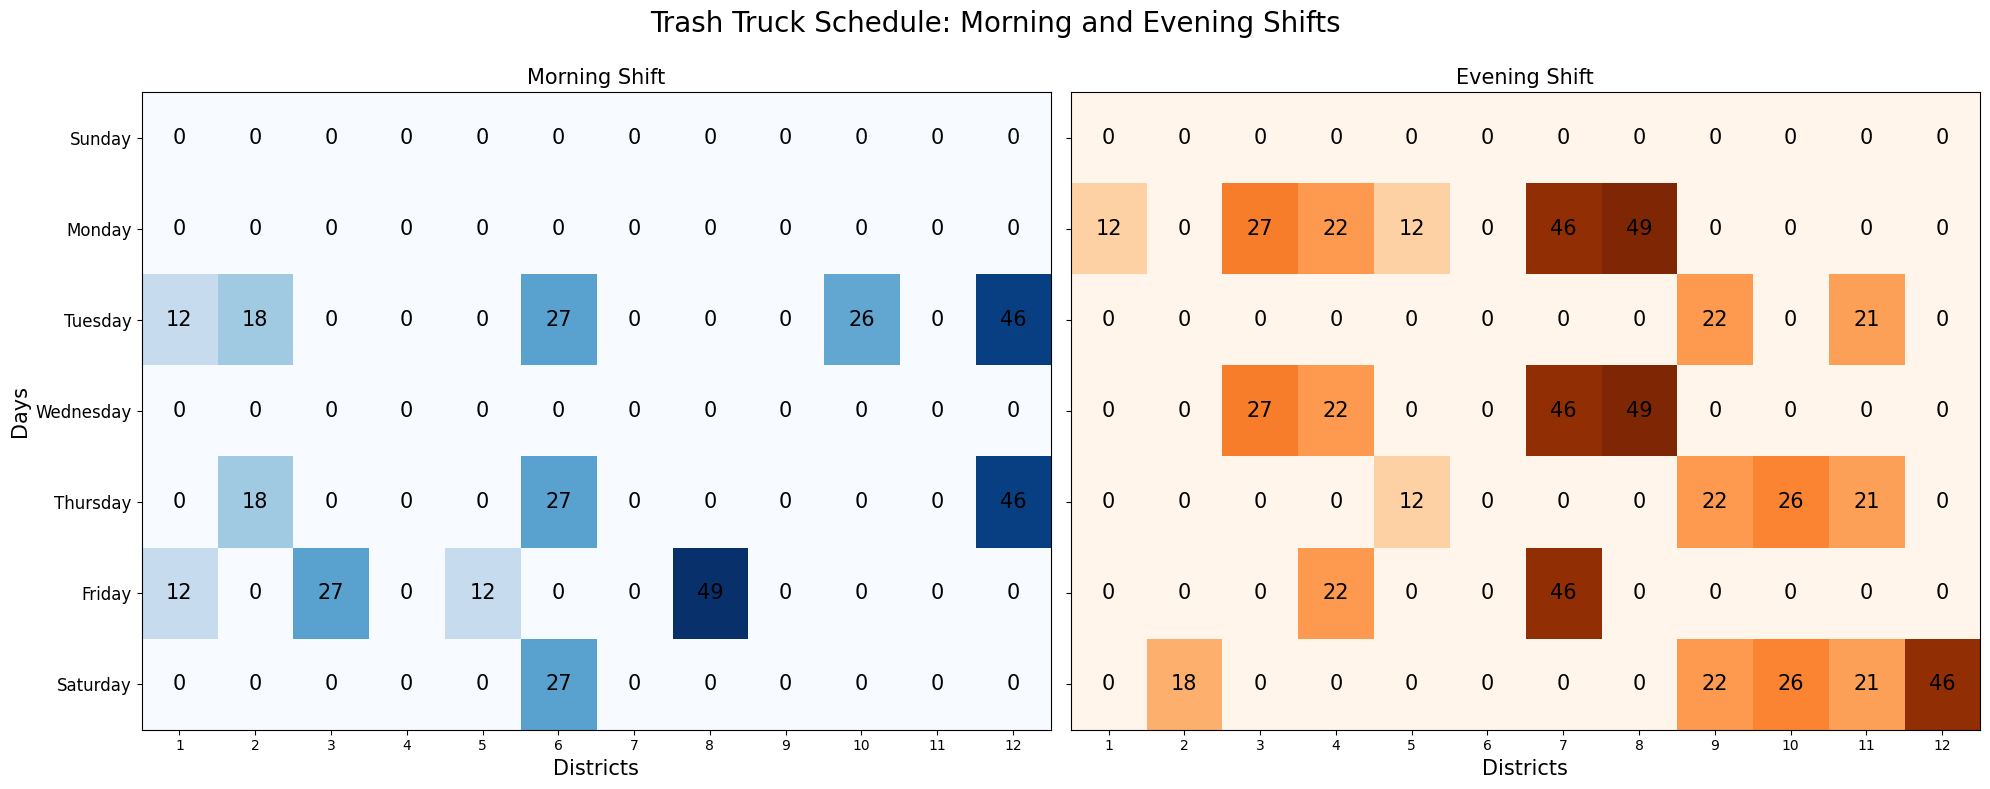

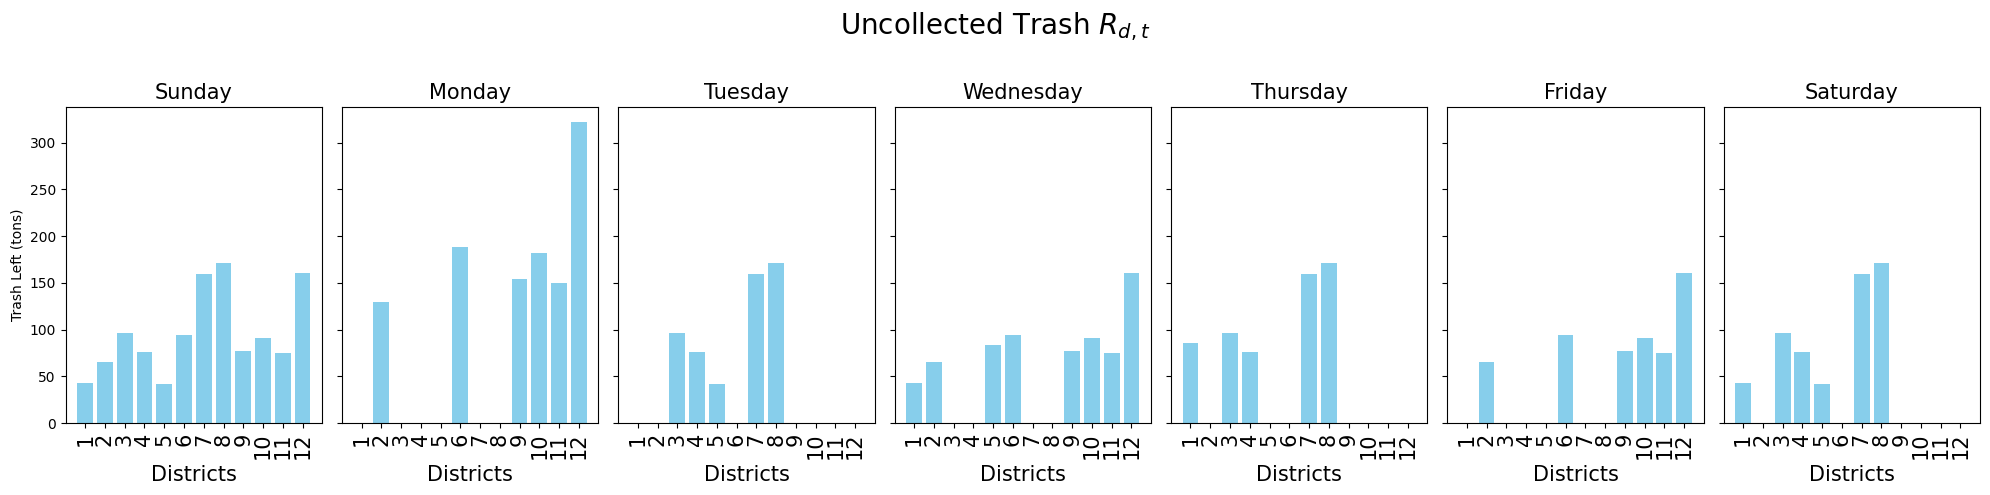

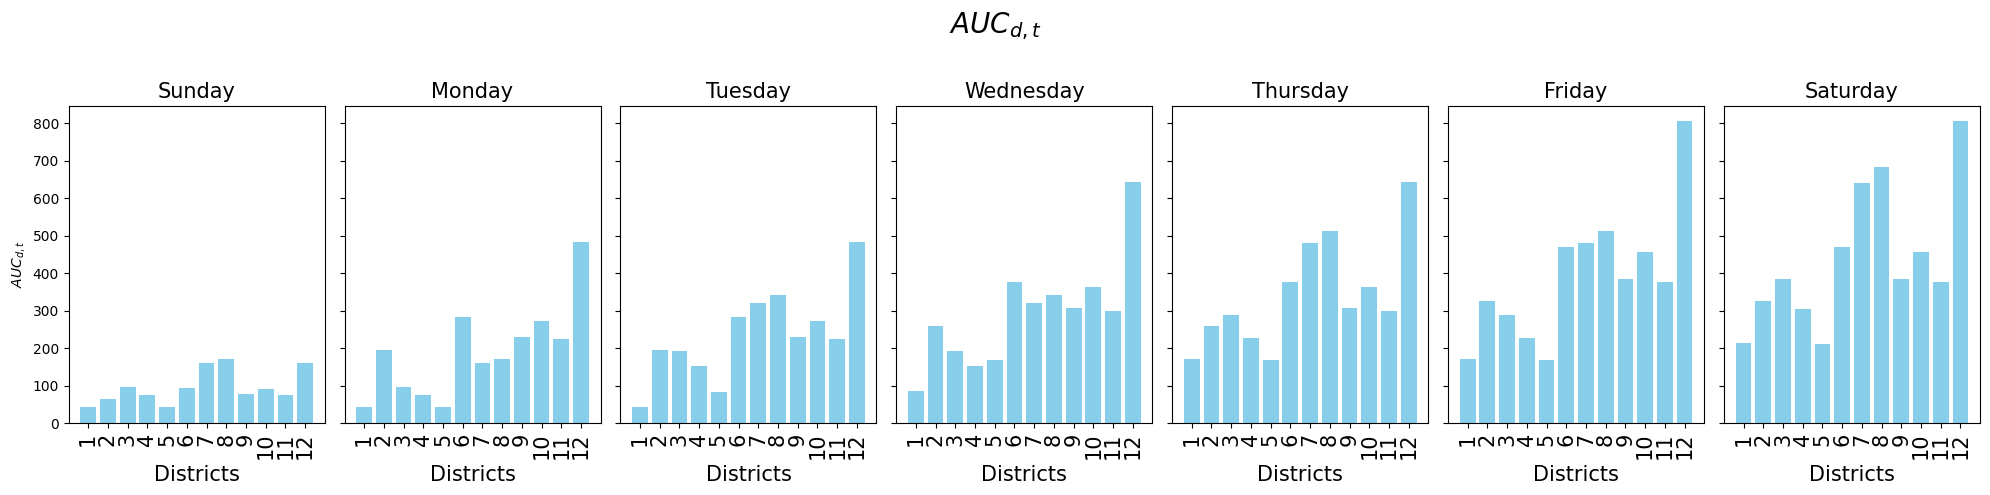

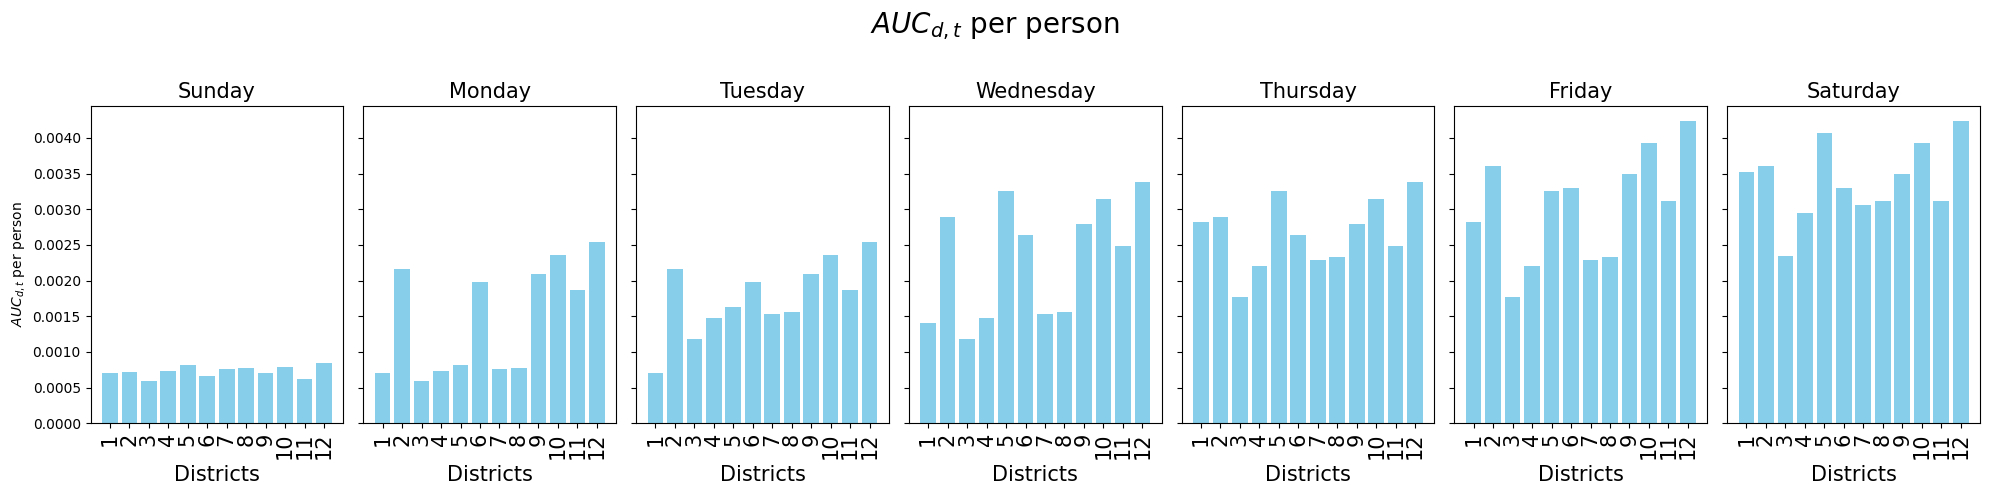

6325.372628726287
1128.057833018694
( $AUC =  5252.0 $, $E_{eq}= 4.298039766329297 ,$ $E_{ef}= 6.325372628726287 $ )
total AUC 5252.0
equity:  4.298039766329297
remaining trash: 588.0
sum 984
(12, 7, 2)


In [23]:
import pickle
from PIL import Image
filename = 'temp/Real'

with open(filename + ".pkl", 'rb') as f:
        schedule = pickle.load(f)

# Load the data
means, std_devs = load_stats()

with open("manhattan_population.pkl", "rb") as f:
    population_array = pickle.load(f)
print(population_array)

District_polulation = population_array
District_polulation = District_polulation / District_polulation.max()
District_area = np.ones(12)
District_status = np.ones(12)


expanded_population = np.tile(population_array, (7,1))

std_devs = std_devs / 100000000

# Display the data
# print("Means:", means)
# print("Standard Deviations:", std_devs)

plot_truck_schedule(schedule, filename + "1.png")
trash = generate_normal_samples(means, std_devs, 7)
leftover, accumulation, truck_amount, trash_collected = simulate_schedule(schedule, district_trash=trash, capacity=12)
plot_week_data(leftover, "Trash Left (tons)", "Uncollected Trash $R_{d,t}$", filename+"2.png")
plot_week_data(calculate_trash_delay_individual(leftover), "$AUC_{d,t}$", "$AUC_{d,t}$", filename+"3.png")
plot_week_data(calculate_trash_delay_individual(leftover) / expanded_population, "$AUC_{d,t}$ per person", "$AUC_{d,t}$ per person", filename+"4.png")

print(efficiency(truck_amount,trash_collected,12))
print(equity(calculate_trash_delay(leftover), leftover[6], District_polulation, District_area, District_status))


print("(", "$AUC = ",  calculate_trash_delay(leftover).sum(), "$,", "$E_{eq}=", np.sqrt(calculate_trash_delay(leftover)/ District_polulation).var(), ",$", "$E_{ef}=", efficiency(truck_amount,trash_collected,12)/1000, "$",  ")")
print("total AUC", calculate_trash_delay(leftover).sum())
print("equity: " , (np.sqrt(calculate_trash_delay(leftover)/ District_polulation).var()))
print("remaining trash:", leftover[6].sum())
print("sum", schedule.sum())
print(schedule.shape)




# Load the images
image1 = Image.open(filename +"1.png")
image2 = Image.open(filename +"2.png")
image3 = Image.open(filename +"3.png")
image4 = Image.open(filename +"4.png")

# Crop 50 pixels from the left and right of the first image
image1 = image1.crop((100, 0, image1.width - 100, image1.height))

# Calculate the minimum width among all images after cropping
min_width = min(image.width for image in [image1, image2, image3, image4])

# Resize each image to the minimum width while keeping aspect ratio
def resize_image(image, target_width):
    # Calculate the new height proportional to the target width
    aspect_ratio = image.height / image.width
    new_height = int(target_width * aspect_ratio)
    return image.resize((target_width, new_height))

image1 = resize_image(image1, min_width)
image2 = resize_image(image2, min_width)
image3 = resize_image(image3, min_width)
image4 = resize_image(image4, min_width)

# Calculate the total height for the combined image
total_height = image1.height + image2.height + image3.height + image4.height

# Create a new image with the combined height and the minimum width
merged_image = Image.new("RGB", (min_width, total_height))

# Paste each image into the merged_image
merged_image.paste(image1, (0, 0))
merged_image.paste(image2, (0, image1.height))
merged_image.paste(image3, (0, image1.height + image2.height))
merged_image.paste(image4, (0, image1.height + image2.height + image3.height))

# Save or show the merged image
merged_image.save(filename+ ".jpg")
merged_image.show()


# trash = generate_normal_samples(means, std_devs , 7)
# print(trash.transpose().shape)
# plot_week_data(trash.transpose(), "a", "a")

In [26]:
print(loss_function(0,0,1000,1,10,0))

-10000


[ 60978  90016 163277 103245  51673 142745 209084 219920 110193 115723
 120511 190020]


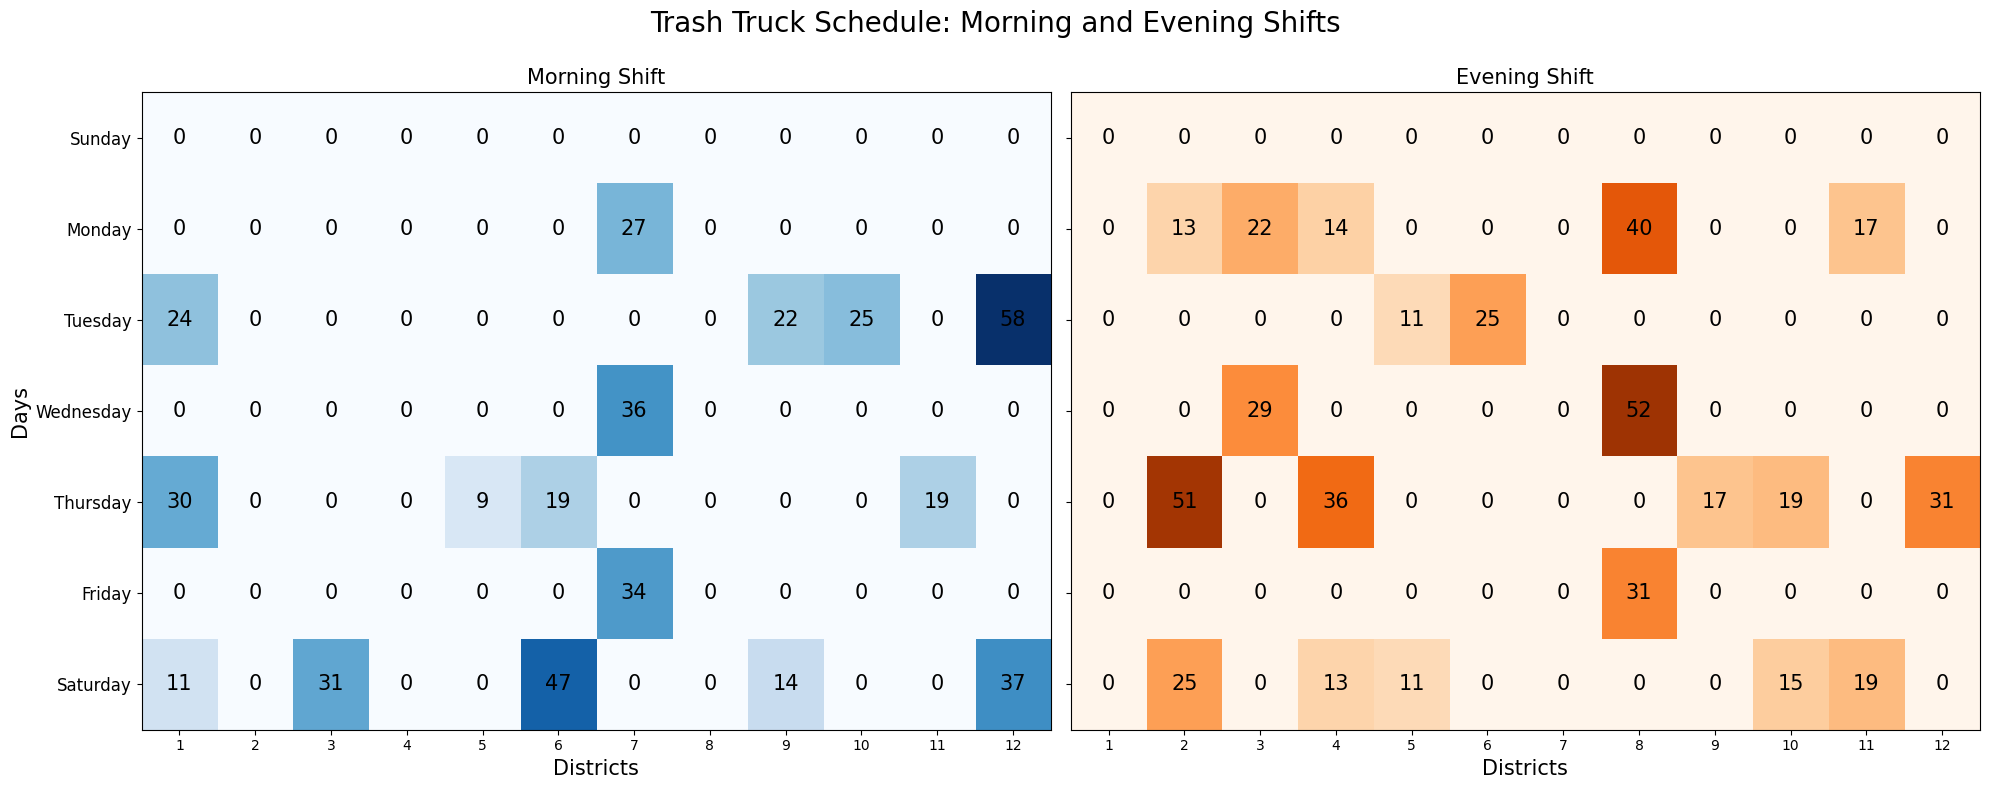

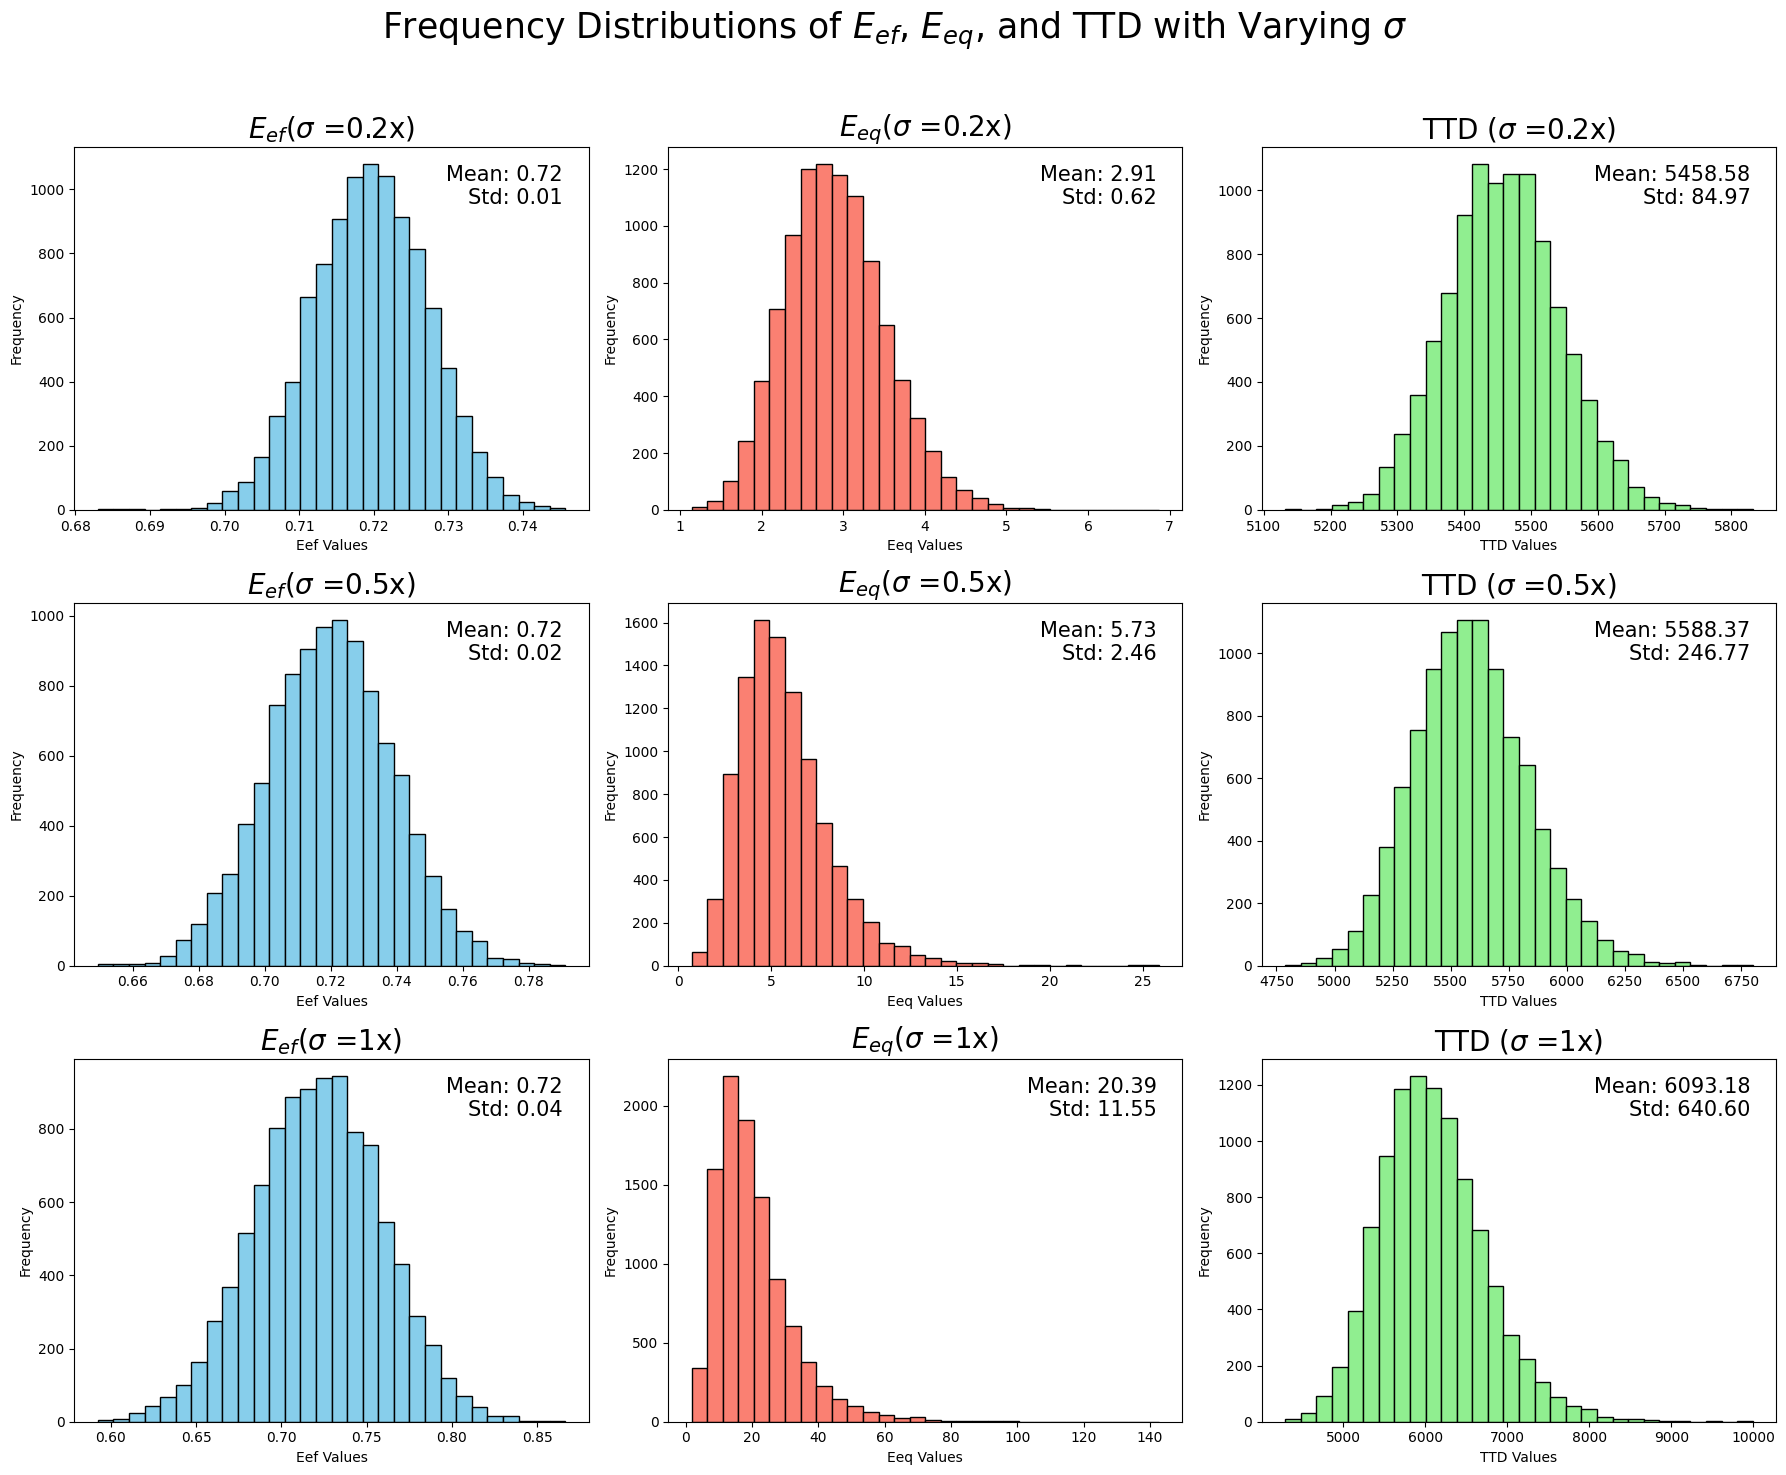

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open('temp/(1,1).pkl', 'rb') as f:
        schedule = pickle.load(f)

# Load the data
means, std_devs = load_stats()

with open("manhattan_population.pkl", "rb") as f:
    population_array = pickle.load(f)
print(population_array)

District_polulation = population_array
District_polulation = District_polulation / District_polulation.max()

expanded_population = np.tile(population_array, (7,1))


# Display the data
# print("Means:", means)
# print("Standard Deviations:", std_devs)

plot_truck_schedule(schedule, "1.png")

import matplotlib.pyplot as plt
import numpy as np

# Assuming generate_normal_samples, simulate_schedule, calculate_trash_delay, efficiency, and other functions are defined


# Loop over each fraction of std_devs
fractions = [1/5, 1/2, 1]

# Create a figure with 9 subplots arranged in a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("Frequency Distributions of $E_{ef}$, $E_{eq}$, and AUC with Varying $\sigma$", fontsize=25)

# Loop over each fraction of std_devs
for row, fraction in enumerate(fractions):
    # Adjust std_devs
    adjusted_std_devs = std_devs * fraction
    
    # Recalculate Eef, Eeq, and AUC with the adjusted std_devs
    Eef = np.zeros(10000)
    Eeq = np.zeros(10000)
    AUC = np.zeros(10000)

    for i in range(10000):
        trash = generate_normal_samples(means, adjusted_std_devs, 7)
        leftover, accumulation, truck_amount, trash_collected = simulate_schedule(schedule, district_trash=trash, capacity=12)
        Eeq[i] = np.sqrt(calculate_trash_delay(leftover) / District_polulation).var()
        Eef[i] = efficiency(truck_amount, trash, 12) / 10000
        AUC[i] = calculate_trash_delay(leftover).sum()

    # Calculate statistics (mean and standard deviation)
    Eef_mean, Eef_std = np.mean(Eef), np.std(Eef)
    Eeq_mean, Eeq_std = np.mean(Eeq), np.std(Eeq)
    AUC_mean, AUC_std = np.mean(AUC), np.std(AUC)

    # Plot the histograms for Eef, Eeq, and AUC with statistics
    # Eef plot
    axs[row, 0].hist(Eef, bins=30, color='skyblue', edgecolor='black')
    axs[row, 0].set_title("$E_{ef}$" + f"($\sigma$ ={fraction}x)", fontsize=20)
    axs[row, 0].set_xlabel("Eef Values")
    axs[row, 0].set_ylabel("Frequency")
    axs[row, 0].text(0.95, 0.95, f"Mean: {Eef_mean:.2f}\nStd: {Eef_std:.2f}", 
                     ha='right', va='top', transform=axs[row, 0].transAxes, fontsize=15)

    # Eeq plot
    axs[row, 1].hist(Eeq, bins=30, color='salmon', edgecolor='black')
    axs[row, 1].set_title("$E_{eq}$"+f"($\sigma$ ={fraction}x)", fontsize=20)
    axs[row, 1].set_xlabel("Eeq Values")
    axs[row, 1].set_ylabel("Frequency")
    axs[row, 1].text(0.95, 0.95, f"Mean: {Eeq_mean:.2f}\nStd: {Eeq_std:.2f}", 
                     ha='right', va='top', transform=axs[row, 1].transAxes, fontsize=15)

    # AUC plot
    axs[row, 2].hist(AUC, bins=30, color='lightgreen', edgecolor='black')
    axs[row, 2].set_title(f"AUC ($\sigma$ ={fraction}x)", fontsize=20)
    axs[row, 2].set_xlabel("AUC Values")
    axs[row, 2].set_ylabel("Frequency")
    axs[row, 2].text(0.95, 0.95, f"Mean: {AUC_mean:.2f}\nStd: {AUC_std:.2f}", 
                     ha='right', va='top', transform=axs[row, 2].transAxes, fontsize=15)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# plot_week_data(leftover, "Trash Left (tons)", "Uncollected Trash $R_{d,t}$", "2.png")
# plot_week_data(calculate_trash_delay_individual(leftover), "AUC", "$AUC_{d,t}$", "3.png")
# plot_week_data(calculate_trash_delay_individual(leftover) / expanded_population, "AUC per person", "AUC per person", "4.png")

# print(efficiency(truck_amount,trash_collected,12))
# print(equity(calculate_trash_delay(leftover), leftover[6], District_polulation, District_area, District_status))

# print("total AUC", calculate_trash_delay(leftover).sum())
# print("equity: " , (np.sqrt(calculate_trash_delay(leftover)/ District_polulation).var()))